In [60]:
# Libraries / Modules
import pandas as pd

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Random forest
from sklearn.ensemble import RandomForestClassifier

# SVC
from sklearn.svm import SVC

# Grid Search CV    # Cross val score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [61]:
df1 = pd.read_csv('/content/drive/MyDrive/0_Hackathon_SBSSU/heart cd/hfpd_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/0_Hackathon_SBSSU/heart cd/hfpd_2.csv')

# X and Y for both the datasets D1 and D2

In [62]:
# x and y for df1
x1 = df1.drop(['HeartDisease'],axis=1)  ;  x1 = x1.drop(['Unnamed: 0'],axis=1)
y1 = df1['HeartDisease']

# x and y for df2
x2 = df2.drop(['HeartDisease'],axis=1)  ;  x2 = x2.drop(['Unnamed: 0'],axis=1)
y2 = df2['HeartDisease']

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x2,y2,test_size=0.2,random_state=1)

---
# Dataset D1
---

# Logistic Regression

In [63]:
#Cross val score WITHOUT Hyper parameter Tuning
log = LogisticRegression(max_iter=10000)

cv = 40
score1_1 = cross_val_score(log,
                         x2,
                         y2,
                         cv=cv)

print("%.1f"%(score1_1.mean()*100))

86.0


In [64]:
# Finding Best tuning Hyper parameters
param_grid = {'C':[0.1,1,10,100,1000],
              'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

cv = 20
grid = GridSearchCV( log,
                     param_grid,
                     cv=cv)

grid.fit(x2,y2)
print(grid.best_score_)
print(grid.best_params_)

0.8603864734299517
{'C': 100, 'solver': 'newton-cg'}


# Naive Bayes

In [65]:
#Cross val score WITHOUT Hyper parameter Tuning
nv = MultinomialNB()
cv = 20
random_state = 100

score2_1 = cross_val_score(nv,
                         x2,
                         y2,
                         cv=cv)

print("%.1f"%(score2_1.mean()*100))
score2_1.max()

84.4


0.9782608695652174

In [66]:
nv = MultinomialNB()
cv = 20
random_state = 100

score2 = cross_val_score(nv,
                         x2,
                         y2,
                         cv=cv)

print("%.1f"%(score2.mean()*100))
score2.max()

84.4


0.9782608695652174

# SVC

In [67]:
#Cross val score WITHOUT Hyper parameter Tuning
svc = SVC(kernel='rbf')
cv = 10
random_state = 100

score2 = cross_val_score(svc,
                         x2,
                         y2,
                         cv=cv)
print(score2)
print("%.1f"%(score2.mean()*100))

[0.90217391 0.94565217 0.7826087  0.93478261 0.85869565 0.82608696
 0.89130435 0.77173913 0.75824176 0.74725275]
84.2


# Decision Tree

In [68]:
#Cross val score WITHOUT Hyper parameter Tuning
dt = DecisionTreeClassifier()

cv = 20
random_state = 100

score2 = cross_val_score(dt,
                         x2,
                         y2,
                         cv=cv)
print(score2)
print("%.1f"%(score2.mean()*100))

[0.84782609 0.80434783 0.84782609 0.86956522 0.93478261 0.84782609
 0.82608696 0.76086957 0.86956522 0.65217391 0.82608696 0.76086957
 0.73913043 0.86956522 0.7826087  0.67391304 0.7173913  0.76086957
 0.77777778 0.64444444]
79.1


In [69]:
# Finding Best tuning Hyper parameters
param_grid = {'max_depth':[2,3,4,5,6,None],
              'criterion':['gini','entropy']}

cv = 20
grid = GridSearchCV( dt,
                     param_grid,
                     cv=cv)

grid.fit(x2,y2)
print(grid.best_score_)
print(grid.best_params_)

0.8385507246376813
{'criterion': 'gini', 'max_depth': 4}


# Random Forest

In [70]:
#Cross val score WITHOUT Hyper parameter Tuning
rf = RandomForestClassifier(n_estimators = 75,max_depth=6)

cv = 10
random_state = 100

score2 = cross_val_score(rf,
                         x2,
                         y2,
                         cv=cv)
print(score2)
print("%.1f"%(score2.mean()*100))

[0.89130435 0.9673913  0.7826087  0.88043478 0.84782609 0.89130435
 0.90217391 0.76086957 0.71428571 0.74725275]
83.9


In [71]:
# Finding Best tuning Hyper parameters
param_grid = {'max_depth':[2,3,4,5,6,None],
              'n_estimators':[10,20,30,40,50]}

cv = 20
grid = GridSearchCV( rf,
                     param_grid,
                     cv=cv)

grid.fit(x2,y2)
print(grid.best_score_)
print(grid.best_params_)

0.8646859903381643
{'max_depth': None, 'n_estimators': 50}


---
# Dataset D2
---

In [72]:
clf = [LogisticRegression(max_iter=10000), MultinomialNB() , SVC(kernel='rbf') , DecisionTreeClassifier() , RandomForestClassifier(n_estimators = 75,max_depth=6)]

names = ['Logistic Regression', 'MultiNaiveBayers','SVC', 'Decision Tree', 'Random Forest']

In [73]:
scores = []

for names , clf in zip(names,clf):
  clf.fit(xtrain,ytrain)
  score = clf.score(xtest,ytest)
  scores.append(score)

In [74]:
scores

[0.9021739130434783,
 0.9021739130434783,
 0.907608695652174,
 0.7554347826086957,
 0.9184782608695652]

In [78]:
df = pd.DataFrame()
names = ['Logistic Regression', 'MultiNaiveBayers','SVC', 'Decision Tree', 'Random Forest']
df['Names'] = names
df['Scores'] = scores
df

,Names,Scores
0,Logistic Regression,0.902174
1,MultiNaiveBayers,0.902174
2,SVC,0.907609
3,Decision Tree,0.755435
4,Random Forest,0.918478


In [79]:
from sklearn.model_selection import cross_val_score

logscore = cross_val_score(log,x2,y2,cv=10)
logscore.mean()*100
decscore = cross_val_score(dec,x2,y2,cv=10)
decscore.mean()*100
rfscore = cross_val_score(rf,x2,y2,cv=10)
rfscore.mean()*100
nvscore = cross_val_score(nv,x2,y2,cv=10)
nvscore.mean()*100
svscore = cross_val_score(sv,x2,y2,cv=10)
svscore.mean()*100

logscore.mean()*100  , decscore.mean()*100  , rfscore.mean()*100  ,nvscore.mean()*100 ,svscore.mean()*100

NameError: ignored

In [80]:
scores = [84.72766364070714, 75.69517439082657, 84.61896798853321, 83.85332059245103, 84.18537983755374]

df = pd.DataFrame()
df['Names'] = ['Logistic','Decision Tree','Random Forest','Naive Bayer' , 'SVM']
df['Scores'] = scores
df

,Names,Scores
0,Logistic,84.727664
1,Decision Tree,75.695174
2,Random Forest,84.618968
3,Naive Bayer,83.853321
4,SVM,84.185380


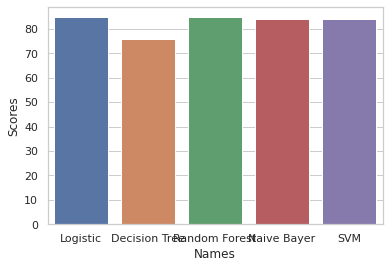

In [81]:
import seaborn as sns

sns.set(style='whitegrid')
ax = sns.barplot(x='Names',y='Scores',data=df)

In [ ]:
# from sklearn.metrics import accuracy_score

# for i in range(0,50):
#   xtrain,xtest,ytrain,ytest = train_test_split(x2,y2,test_size=0.2,random_state=i)
#   print(f'\n\nIteration {i}')
#   log = LogisticRegression(max_iter=10000)
#   dec = DecisionTreeClassifier()
#   rf = RandomForestClassifier(n_estimators = 75,max_depth=6)
#   nv = MultinomialNB()
#   sv = SVC(kernel='rbf')


#   log.fit(xtrain,ytrain)
#   logpred = log.predict(xtest)
#   dec.fit(xtrain,ytrain)
#   decpred = dec.predict(xtest)
#   rf.fit(xtrain,ytrain)
#   rfpred = rf.predict(xtest)
#   nv.fit(xtrain,ytrain)
#   nvpred = nv.predict(xtest)
#   sv.fit(xtrain,ytrain)
#   svpred = sv.predict(xtest)

#   print('Logistic Accuracy: ',accuracy_score(ytest,logpred))
#   print('Decision Accuracy: ',accuracy_score(ytest,decpred))
#   print('Random Forest Accuracy: ',accuracy_score(ytest,rfpred))
#   print('Naive Accuracy: ',accuracy_score(ytest,nvpred))
#   print('SVM Accuracy: ',accuracy_score(ytest,svpred))

# Logistic Regression

In [ ]:
#Cross val score WITHOUT Hyper parameter Tuning


# Naive Bayes

In [ ]:
#Cross val score WITHOUT Hyper parameter Tuning


# SVC

In [ ]:
#Cross val score WITHOUT Hyper parameter Tuning


# Decision Tree

In [ ]:
#Cross val score WITHOUT Hyper parameter Tuning


# Random Forest

In [ ]:
#Cross val score WITHOUT Hyper parameter Tuning


# Conclusion & Final Model

In [ ]:
from sklearn.metrics import accuracy_score
max = 0
for x in range(1000):
  x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.2,random_state = x)

  final_model = RandomForestClassifier(n_estimators = 75,max_depth=6)
  final_model.fit(x_train,y_train)
  y = final_model.predict(x_test)
  if accuracy_score(y,y_test) > max:
    max = accuracy_score(y,y_test)
    print(accuracy_score(y,y_test), x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.2,random_state = 880)

final_model = RandomForestClassifier(n_estimators = 75,max_depth=6)
final_model.fit(x_train,y_train)
y = final_model.predict(x_test)
max = accuracy_score(y,y_test)
print(accuracy_score(y,y_test))

In [ ]:
import pickle

pickle.dump(final_model,open("rf_model.pkl",'wb'))